Generate the datasets A and B in R2, each consisting of 2000 data points from a
normal distribution. The dataset A and B has been drawn from the N (μ1, Σ1 ) and
N( μ2, Σ2 ). Let us fix the μ1 = [-1,-1] and μ2 = [2,1]. Separate the 500 data points
from each class as a testing set. Plot the optimal Bayesian decision boundary.

1. Write a function implementing the logistic regression model using the gradient
descent method. Obtain the best accuracy on the test set by tuning the value of the
parameter λ. Plot the decision boundary obtained by the logistic regression.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mu1 = np.array([-1, -1])
mu2 = np.array([2, 1])
sigma = np.array([[0.6, 0], [0, 0.6]])

# Set the number of data points
n = 2000

# Generate dataset A
np.random.seed(666)  # For reproducibility
data_A = np.random.multivariate_normal(mu1, sigma, n)

# Generate dataset B
np.random.seed(333)  # For reproducibility
data_B = np.random.multivariate_normal(mu2, sigma, n)


In [3]:
from sklearn.model_selection import train_test_split

A_train, A_test, B_train, B_test = train_test_split(data_A,data_B, test_size=500, random_state=0)

A_test = data_A[1:500, ]
B_test = data_B[1:500, ]
A_train = data_A[500:2000, ]
B_train = data_B[500:2000, ]

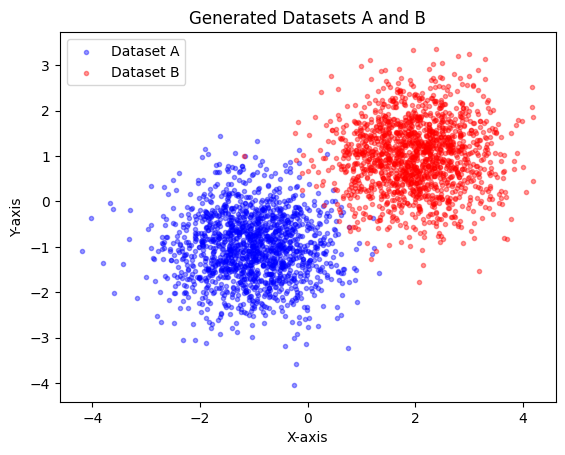

In [4]:
# Optionally, you can visualize the datasets using Matplotlib

plt.scatter(A_train[:, 0], A_train[:, 1], c='blue', marker='.', label='Dataset A',alpha=0.4)
plt.scatter(B_train[:, 0], B_train[:, 1], c='red', marker='.', label='Dataset B',alpha=0.4)
plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Generated Datasets A and B')
plt.show()

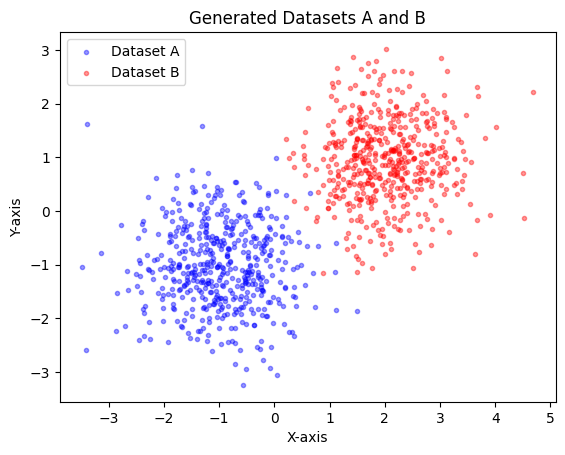

In [5]:
# Optionally, you can visualize the datasets using Matplotlib

plt.scatter(A_test[:, 0], A_test[:, 1], c='blue', marker='.', label='Dataset A',alpha=0.4)
plt.scatter(B_test[:, 0], B_test[:, 1], c='red', marker='.', label='Dataset B',alpha=0.4)
plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Generated Datasets A and B')
plt.show()

In [6]:
data = np.concatenate((np.column_stack((A_train, np.zeros(len(A_train)))), np.column_stack((B_train, np.ones(len(B_train))))))

In [7]:

# Define the logistic regression function with gradient descent
def logistic_regression(data, lambd, learning_rate, max_iter):
    X = data[:, :2]
    y = data[:, 2]
    m = len(data)

    # Initialize weights
    theta = np.zeros(3)

    for _ in range(max_iter):
        # Calculate the sigmoid function
        z = np.dot(X, theta[:2]) + theta[2]
        h = 1 / (1 + np.exp(-z))

        # Calculate the gradient
        gradient = (np.dot(X.T, h - y) + 2 * lambd * np.array([0, theta[0]], theta[1])) / m


        # Update the weights
        theta[:2] -= learning_rate * gradient[:1]
        theta[2] -= learning_rate * gradient[1]

    return theta

# Tune the value of lambda
lambda_values = np.arange(0, 5.1, 0.2)
accuracies = []

for lambd in lambda_values:
    max_iter = 20000
    learning_rate = 0.01

    # Train the logistic regression model
    theta = logistic_regression(data, lambd, learning_rate, max_iter)

    # Make predictions on the test set
    test_X = np.concatenate((A_test, B_test))
    test_y = np.concatenate((np.zeros(len(A_test)), np.ones(len(B_test))))
    test_predictions = 1 / (1 + np.exp(-(np.dot(test_X, theta[:2]) + theta[2])))

    # Calculate accuracy
    accuracy = np.mean((test_predictions >= 0.5) == (test_y == 1))
    accuracies.append(accuracy)

# Find the best lambda
best_lambda = lambda_values[np.argmax(accuracies)]
# Train the logistic regression model with the best lambda
theta = logistic_regression(data, best_lambda, learning_rate, max_iter)


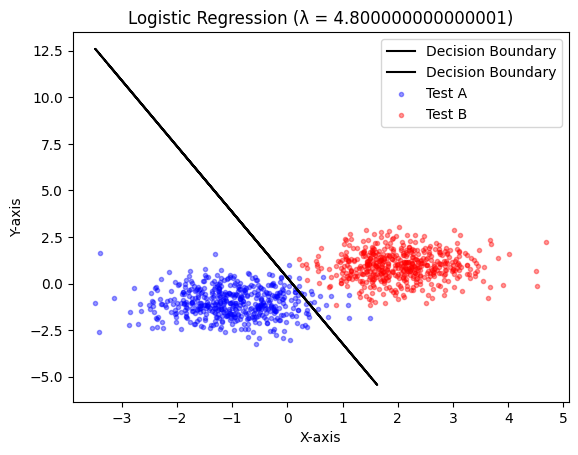

In [14]:
# Modified code with line for decision boundary
# plt.scatter(data[:, 0], data[:, 1], c=data[:, 2], cmap=plt.cm.Paired)

# Compute and plot the decision boundary
decision_boundary = - ((theta[0]) / theta[2]) - (theta[1] / theta[2])*A_test
plt.plot(A_test, decision_boundary, 'k-', label='Decision Boundary')


plt.scatter(A_test[:, 0], A_test[:, 1], c='blue', marker='.', label='Test A',alpha=0.4)
plt.scatter(B_test[:, 0], B_test[:, 1], c='red', marker='.', label='Test B',alpha=0.4)
plt.legend()
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title(f"Logistic Regression (λ = {best_lambda})")


plt.show()


In [9]:
test_y = np.concatenate((np.zeros(len(A_test)), np.ones(len(B_test))))
test_predictions = 1 / (1 + np.exp(-(np.dot(test_X, theta[:2]) + theta[2])))

In [10]:
def calculate_accuracy(y_true, y_pred):
    accuracy = np.mean((y_pred >= 0.5) == (test_y == 1))
    return accuracy
# Assuming test_y contains the actual labels and test_predictions contains the predicted labels (0 or 1)
accuracy = calculate_accuracy(test_y, test_predictions)

print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 84.07%


**2. Consider the Iris dataset. The dataset contains three types of flowers described by  the four features. Consider only the data points with labels 1 and 2. Divide the  dataset into training, testing, and validation in the ratio 8:1:1. Use the training set to  train the logistic regression model. Use the validation set to tune the parameter  value λ. Finally, obtain the accuracy of the test set.**

In [ ]:
# Load the Iris dataset and filter data points with labels 1 and 2
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[iris.target != 0]
y = (iris.target[iris.target != 0] - 1).astype(int)  # Convert labels 1 and 2 to 0 and 1

# Add a column of ones to the features for the bias term
X_bias = np.c_[np.ones(X.shape[0]), X]

# Set random seed for reproducibility
np.random.seed(42)

# Shuffle the data
shuffle_index = np.random.permutation(len(X_bias))
X_shuffled, y_shuffled = X_bias[shuffle_index], y[shuffle_index]

# Divide the dataset into training, validation, and test sets
train_ratio, val_ratio, test_ratio = 0.8, 0.1, 0.1
train_size = int(len(X_shuffled) * train_ratio)
val_size = int(len(X_shuffled) * val_ratio)

X_train, y_train = X_shuffled[:train_size], y_shuffled[:train_size]
X_val, y_val = X_shuffled[train_size:train_size + val_size], y_shuffled[train_size:train_size + val_size]
X_test, y_test = X_shuffled[train_size + val_size:], y_shuffled[train_size + val_size:]

In [ ]:
import numpy as np

class LogisticRegressionCustom:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.theta = np.zeros(X.shape[1])
        m = len(y)

        for i in range(self.num_iterations):
            predictions = self.sigmoid(np.dot(X, self.theta))
            error = y - predictions
            gradient = np.dot(X.T, error) / m
            self.theta += self.learning_rate * gradient

    def predict(self, X):
        predictions = self.sigmoid(np.dot(X, self.theta))
        return (predictions >= 0.5).astype(int)



# Train the logistic regression model
model = LogisticRegressionCustom(learning_rate=0.1, num_iterations=10000)
model.fit(X_train, y_train)

# Evaluate the model on the test set
test_predictions = model.predict(X_test)
test_accuracy = np.mean(test_predictions == y_test)

print(f"Accuracy on Test Set: {test_accuracy*100} %")


Accuracy on Test Set: 90.0 %
